In [1]:
# -*- coding: utf-8 -*-

### Imports ###
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams["figure.dpi"] = 300  # highres display
from IPython.display import clear_output
from time import sleep

In [2]:
#@title Helper Functions
### Helper Functions ###
def HammingDistance(x, y):
    "gives Hamming distance b/w #x and #y"
    count = 0
    if len(x) == len(y):
        for _ in range(len(x)):
            if x[_] != y[_]:
                count += 1
    else:
        raise ValueError("Incorrect dimensions of input vectors")
    return count / len(x)


def SyncUpdate(W, x, bias):
    "returns the synchronously updated neuron values #x using #W"
    ### choose preferred #activation function {tanh, sign, sigmoid}
    return np.sign(np.dot(W, x) - bias )


def AsyncUpdate(W, x, bias, updates=1):
    "returns the asynchronously updated neuron values #x using #W"
    for _ in np.random.randint(low=0, high=len(x), size=updates):
        x[_] = Step(np.dot(W[_, :], x) - bias[_])
    return x


def ProbUpdate(W, x, bias, beta=1000, updates=10):
    "returns the Metropolis updated neuron values #x using #W. #beta is the temperature parameter"
    for _ in np.random.randint(0, len(x), size=updates):
        h_ = (np.dot(W[_, :], x)- bias[_])/len(x)
        x[_] = np.random.choice([+1, 0], p=[Sigmoid(beta*h_), Sigmoid(-beta*h_)])
    return x


def Energy(W, x, bias):
    "return the energy of a particular configuration #x of neuron values"
    return -0.5 * (1 / len(x)) * ( np.dot(x, np.dot(W, x)) - np.dot(bias,x))

def Step(x):
    if x>0: return 1
    if x<=0: return 0
    
def Sigmoid(x):
    "return the sigmoid of x#"
    return 1 / (1 + np.exp(-x))

In [3]:
#@title Update Run
def Run(steps, x0, W, bias, update_rule= 'AsyncUpdate', skip_steps = 10):
    """ function to update the configuration of network
        steps: no. of steps of iteraation
        x0: input initial configuration of network
        W: input weight matrix
        update_rule: specify update rule
        skip steps: no. steps skipped while visualization"""
    E = [] ## list to store energy
    stable_iter = 0
    for _ in range(steps):
        if update_rule== 'SyncUpdate' : x0 = SyncUpdate(W, x0, bias)
        elif update_rule== 'AsyncUpdate' : x0 = AsyncUpdate(W, x0, bias, updates= 10)
        elif update_rule== 'ProbUpdate' : x0 = ProbUpdate(W, x0, bias, updates=100)
        E.append(Energy(W, x0, bias))
        if ((E[_]- E[_-1])/E[_])**2 <= 0.0001: stable_iter = _*skip_steps  

        ## visualization sub-routine ~ 
        if (_%skip_steps == 0):
            clear_output(wait= True)
            plt.figure(figsize= (12,12))
            plt.subplot(221)
            plt.title("Current Config: ")
            sns.heatmap(x0.reshape(n,n),xticklabels= False, yticklabels= False, cbar= False)
            plt.subplot(222)
            plt.title('Energy')
            plt.plot(np.linspace(0,len(E),len(E)),E)
            plt.xlabel('Iterations ->')
            plt.show()
            sleep(0.01)

    return stable_iter


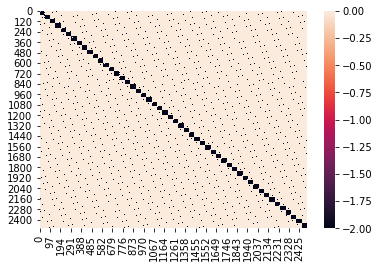

In [4]:
### Initializations ###

## dimension of grid n
n= 50
## no, of neurons N
N = n*n

## construct weight matrix W
W = np.zeros((N,N))
for i in range(n):
    for j in range(n):
        index = i*n + j
        for _ in range(j+1, n): W[index, index-j+_] = W[index-j+_,index] = -2
        for _ in range(i+1, n): W[index, _*n+ j] = W[_*n+ j, index] = -2
sns.heatmap(W)

## construt bias #bias
bias = -2* np.ones(N)

## random initial config
x0 = np.random.choice([0,1], N)

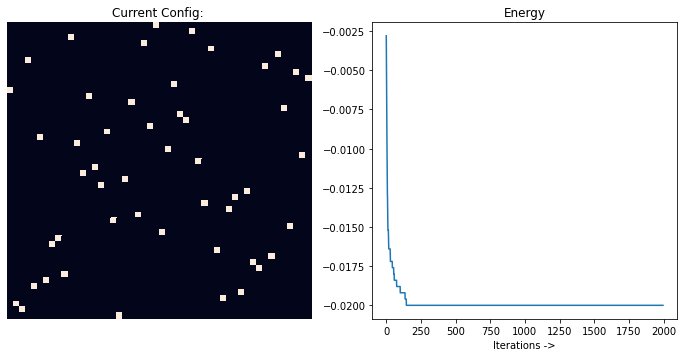

9995

In [7]:
Run(2000, np.random.choice([1,0], N, p=[0,1]), W, bias, update_rule='AsyncUpdate', skip_steps= 5)


In [ ]:
n=5:299
n=10:995
n=20:995
n=50:4995